This is a Dataset with the Student's Performance provided by Kaggle.com

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#just renaming the race/ethnicity column for somthing way simple
df.rename(columns={'race/ethnicity': 'group'}, inplace=True)

In [6]:
df.group.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
df.columns= [x.lower().replace(' ', '_') for x in df.columns]

In [8]:
df.head(3)

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [9]:
df['average_score'] = round((df['math_score'] + df['reading_score'] + df['writing_score'])/3, 1)

In [10]:
df.head(3)

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7


In [11]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### Performance based on gender

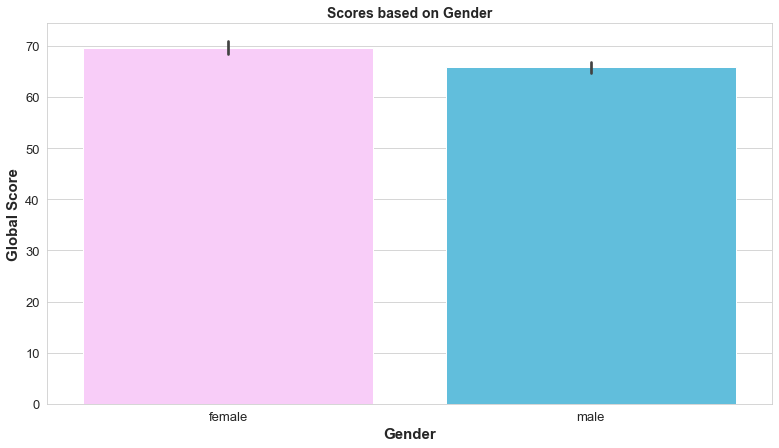

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 7))
sns.barplot(data = df, x = 'gender', y='average_score', palette={'female': '#ffc6ff', 'male': '#4cc9f0'})
plt.title('Scores based on Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=15, weight='bold')
plt.ylabel('Global Score', fontsize=15, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In the chart above we can see that female students perform better than male students 

### Was the Test Preparation Course enough for students?

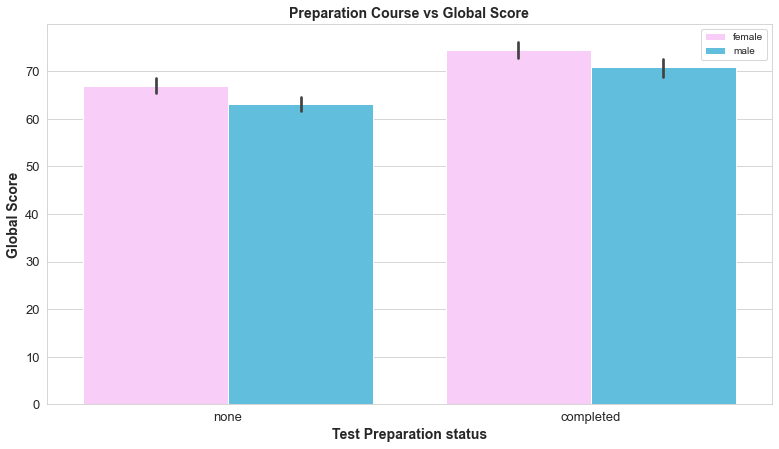

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 7))
sns.barplot(data = df, x = 'test_preparation_course', y = 'average_score', hue = 'gender', palette={'female': '#ffc6ff', 'male': '#4cc9f0'})
plt.title('Preparation Course vs Global Score', fontsize=14, weight='bold')
plt.xlabel('Test Preparation status', fontsize = 14, weight='bold')
plt.ylabel('Global Score', fontsize = 14, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper right')
plt.show()

The Preparation Course had a positive impact in the students global score. Females did a great job here in both cases

### Which Group did it better?

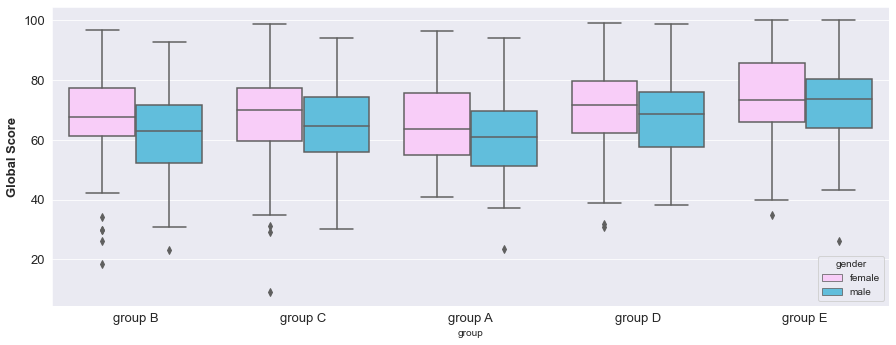

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 5.5))
sns.boxplot(data=df, x='group', y='average_score', hue='gender', palette={'female': '#ffc6ff', 'male': '#4cc9f0'})
plt.ylabel('Global Score', fontsize=13, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In the above Box Chart, we could appreciate that students from Group E performed better than the rest of the students in other Groups. By the way, females in Group E still doing a better job than males

### Scores based on the Parents Education Levels

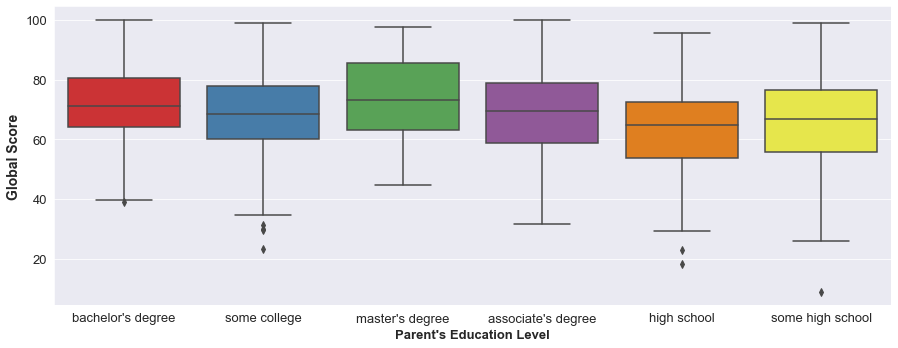

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5.5))
sns.boxplot(data=df, x='parental_level_of_education', y='average_score', palette='Set1')
plt.xlabel('Parent\'s Education Level', fontsize=13, weight='bold')
plt.ylabel('Global Score', fontsize=14, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In the chart above, we can see that parents we a higher level of education had a better impact in their children performance. Apperantly, the kids tend to mimic their parent's

### Why Group A did worse than the other groups??

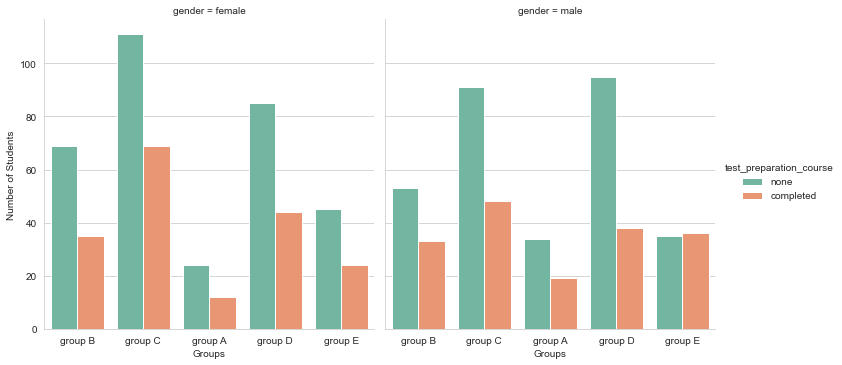

In [16]:
sns.set_style('whitegrid')
graph = sns.catplot(data = df, x = 'group',
           hue = 'test_preparation_course',
           col = 'gender',
           kind = 'count',
           col_wrap = 2,
           palette='Set2')


graph.set_axis_labels("Groups", "Number of Students")
plt.show()

It seems that Group A scored lee because they did not take their Preparation Course too serious like the other groups

In [17]:
df.head(3)

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7


In [18]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

### Is there any relation between the lunch type and the grades?

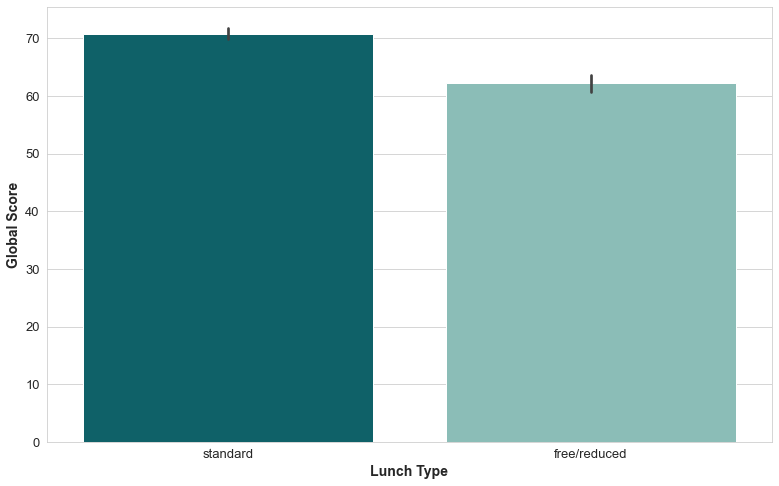

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 8))
sns.barplot(data= df, x='lunch', y='average_score', palette={'standard': '#006d77', 'free/reduced':'#83c5be'})
plt.xlabel('lunch type'.title(), fontsize=14, weight='bold')
plt.ylabel('global score'.title(), fontsize=14, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

We can see that there is a relation between students who eat a 'standard' lunch vs the ones that eat 'free/reduced' lunch. Food has a positive impact in the students performance

### Correlations between tests

We have to import the .pearsonr() function from scipy.stats in order to calculate correlations

In [20]:
from scipy.stats import pearsonr 

In [21]:
math_reading_correlation, p = pearsonr(df.math_score, df.reading_score)

In [22]:
math_reading_correlation.round(2)

0.82

In [23]:
reading_writing_correlation, p = pearsonr(df.writing_score, df.reading_score)

In [24]:
reading_writing_correlation.round(2) #highest correlation

0.95

In [25]:
math_writing_correlation, p = pearsonr(df.math_score, df.writing_score)

In [26]:
math_writing_correlation.round(2)

0.8

In [27]:
math_data = np.array(df['math_score']).reshape(-1, 1)
writing_data = np.array(df['writing_score']).reshape(-1, 1)
reading_data = np.array(df['reading_score']).reshape(-1, 1)

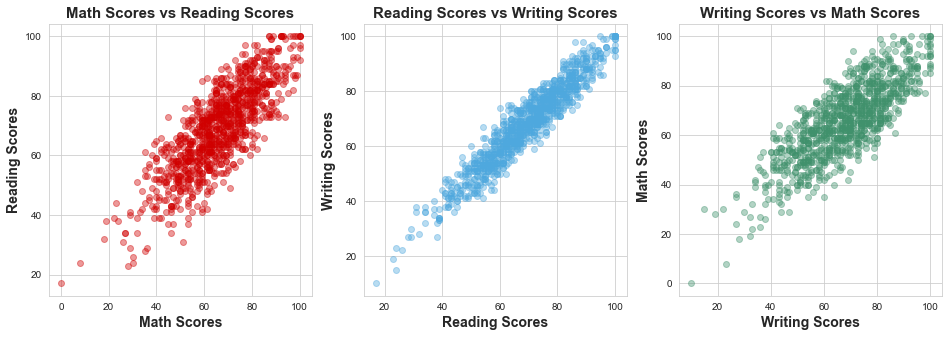

In [28]:
f, axs = plt.subplots(figsize=(16,5))

plt.subplot(131)
plt.scatter(x = math_data, y = reading_data, alpha=0.4, color='#d00000')
plt.title('Math Scores vs Reading Scores', fontsize=15, weight='bold')
plt.xlabel('Math Scores', fontsize=14, weight='bold')
plt.ylabel('Reading Scores', fontsize=14, weight='bold')
#ax1.set_xticks(fontsize=13)
#ax1.set_yticks(fontsize=13)

plt.subplot(132)
plt.scatter(x = reading_data, y = writing_data, alpha=0.4, color='#4ea8de')
plt.title('Reading Scores vs Writing Scores', fontsize=15, weight='bold')
plt.xlabel('Reading Scores', fontsize=14, weight='bold')
plt.ylabel('Writing Scores', fontsize=14, weight='bold')
#ax2.x_ticks(fontsize=13)
#ax2.y_ticks(fontsize=13)

plt.subplot(133)
plt.scatter(x = writing_data, y = math_data, alpha=0.4, color='#40916c')
plt.title('Writing Scores vs Math Scores', fontsize=15, weight='bold')
plt.xlabel('Writing Scores', fontsize=14, weight='bold')
plt.ylabel('Math Scores', fontsize=14, weight='bold')
#ax3.x_ticks(fontsize=13)
#ax3.y_ticks(fontsize=13)


plt.show()

Despite all of the test have a correlation with each other, the strongest correlation was between "Reading Scores" and "Writing Scores"; correlation was 0.95 to be precise!